# HarvestStat Data Profiling - Ghana

In [1]:
import glob
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
import pandas as pd
import geopandas as gpd
from tools import retreive_fdw_data, save_npz, PrintAdminUnits, PlotAdminShapes
from tools import FDW_PD_Sweeper, FDW_PD_AvalTable, FDW_PD_Compiling, FDW_PD_ValidateFnidName
from tools import FDW_PD_CreateAdminLink, FDW_PD_RatioAdminLink, FDW_PD_ConnectAdminLink
from tools import product_name_mapping, FDW_PD_CaliSeasonYear, FDW_PD_MergeCropProductionSystem
from tools_graphic import PlotBarProduction, PlotLinePAY
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)
pd.options.mode.chained_assignment = None

In [2]:
# Set loading parameters ------------------------ #
country_name = 'Ghana'
country_iso2 = 'GH'
use_api_data = False
requires_authentication = False
# ----------------------------------------------- #

# Load FEWS NET administrative boundaries ------- #
epsg = 'epsg:32631' # Ghana
fn_shapes = sorted(glob.glob(f"../data/shapefile/fewsnet/{country_iso2}_Admin?_????.shp"))
shape_all = []
for fn in fn_shapes:
    name = fn[-18:-4]
    exec('%s = gpd.read_file("%s").to_crs("%s")' % (name, fn, epsg))
    exec('%s["area"] = %s["geometry"].area/10**6' % (name, name))
    exec('shape_all.append(%s)' % (name))
shape_all = pd.concat(shape_all, axis=0).reset_index(drop=True)
# PrintAdminUnits(shape_all)
# ----------------------------------------------- #

# Load FDW data -------------------------------- #
df = retreive_fdw_data(country_name, country_iso2, use_api_data, requires_authentication)
# ----------------------------------------------- #

Data is loaded from the local file.
../data/crop_raw_data/adm_crop_data_raw_GH.csv is loaded.


In [3]:
# Manual Pre-processing before Sweeping --------- #
# 1. Default setting
# a.1) None-type crop production system
df.loc[df['crop_production_system'].isna(), 'crop_production_system'] = 'none'
df.loc[df['crop_production_system'] == '', 'crop_production_system'] = 'none'
# a.2) Early in the record the catch-all crop production system is 'all' rather than none. Make these to none-type
df.loc[df['crop_production_system'] == 'all', 'crop_production_system'] = 'none'
# b) None-type population group
df.loc[df['population_group'].isna(), 'population_group'] = 'none'
df.loc[df['population_group'] == '', 'population_group'] = 'none'
# ----------------------------------------------- #
#Drop the hundreds of blank (nan) rows that are duplicates of rows that do have data
df = df[np.isfinite(df.value)]
# df = df.dropna(subset=['admin_2'])

# FDW Production Data Inspection ---------------- #
df, df_raw = FDW_PD_Sweeper(df)
table_dict = FDW_PD_AvalTable(df, shape_all)
# ----------------------------------------------- #

# # FEWS NET Shapefile comparison ----------------- #
shape_used = pd.concat([GH_Admin1_1982,GH_Admin1_1983,GH_Admin1_1989,GH_Admin1_2004,GH_Admin1_2008,GH_Admin1_2012,GH_Admin1_2018], axis=0)
PlotAdminShapes(shape_used, label=True)
# # ----------------------------------------------- #

- Remove missing records ---------------------- #
Orignial data points: 5,968
67/67 "Area Harvested" points are retained.
2,042/2,042 "Area Planted" points are retained.
1,940/1,940 "Quantity Produced" points are retained.
1,919/1,919 "Yield" points are retained.
Current data points: 5,968

- Minor changes are applied ------------------- #

- Basic information --------------------------- #
Data period: 1984 - 2022
17 grain types are found: African oil palm nut, Bambara groundnut, Cassava, Cooking Banana (unspecified), Cowpea (unspecified), Groundnuts (In Shell), Maize (Corn), Millet, Okras (Fresh), Rice (Paddy), Sorghum, Soybean (unspecified), Sugarcane (for sugar), Sweet Potatoes, Taro/Cocoyam (Unspecified), Tomato, Yams
3 seasons are found: Annual (12-01), Main (12-01), Second (12-01)
1 crop production system are found: All (PS)
Data sources include:
[1] GSS, Ghana --- Official agricultural statistics, Ghana
[2] MOFA, Ghana --- Official agricultural statistics, Ghana
Administrative-1

- Recorded years per season ------------------- #
Annual: 35 years (1984-2018) (missing: 12 years)
Main: 39 years (1984-2022) (missing: 12 years)
Second: 1 years (1984-1984) (missing: 0 years)

- Number of "Quantity Produced" data points --- #
GH1983A1: 0 data points are found.
GH1989A1: 419 data points are found.
GH2004A1: 263 data points are found.
GH2008A1: 276 data points are found.
GH2012A1: 502 data points are found.
GH2018A1: 480 data points are found.

- Districts with population group(s) ---------- #
0 districts includes 'population_group'.

Table of available data


----------------------------------------------- #
Crop type: African oil palm nut
----------------------------------------------- #
season_name              Annual
crop_production_system All (PS)
fnid_short               1983A1
year                           
1984                       6/10
----------------------------------------------- #
Crop type: Bambara groundnut
----------------------------------------------- #
season_name              Second
crop_production_system All (PS)
fnid_short               1983A1
year                           
1984                       1/10
----------------------------------------------- #
Crop type: Cassava
----------------------------------------------- #
season_name              Annual                                 Main
crop_production_system All (PS)                             All (PS)
fnid_short               1983A1 1989A1 2004A1 2008A1 2012A1   2018A1
year                                                                
1984                    

../figures/GH_admin_shapes.png is saved.


## Ghana
Ghana crop seasonal calendar

<!-- ![FEWS NET](https://fews.net/sites/default/files/styles/large_width_880/public/2023-03/seasonal-calendar-cameroon.png?itok=FlNQVtNG) -->

![USDA](https://ipad.fas.usda.gov/rssiws/al/crop_calendar/images/wafrica_gh_calendar.png)


- comparison of boundaries
![image](../figures/GH_admin_shapes.png)

- In Ghana, basd on the FEWS NET data, there was one time of change in administrative units: 2018

| year	 | Admin1   | # units   | Admin2   | # units   | Admin3   | # units   |
| :---: | :----:  | :----:   | :----:   | :---:  | :---:  |:---:  |
| 1970	 | GH1970A1 | 8	| nan	| 0	| nan	| 0	|
| 1982	 | GH1982A1 | 9	| nan	| 0	| nan	| 0	|
| 1983	 | GH1983A1 | 10	| nan	| 0	| nan	| 0	|
| 1989	 | GH1989A1 | 10	| nan	| 0	| nan	| 0	|
| 2004	 | GH2004A1 | 10	| nan	| 0	| nan	| 0	|
| 2008	 | GH2008A1 | 10	| nan	| 0	| nan	| 0	|
| 2012	 | GH2012A1 | 10	| nan	| 0	| nan	| 0	|
| 2018	 | GH2018A1 | 16	| nan	| 0	| nan	| 0	|


- Here, we use **`GH2018A1`** to represent all admin-level 1 crop data .
- At admin-level 1,there are three seasons`Annual`,`Main`,`Second`.

In [4]:
# Define the latest shapefile ------------------- #
latest_level = 1
shape_latest = GH_Admin1_2018.copy().to_crs('epsg:4326')
# ----------------------------------------------- #

# Validation of FNIDs and Names ----------------- #
df = FDW_PD_ValidateFnidName(df, shape_used, shape_latest)
# ----------------------------------------------- #
# FDW Production Data Compiling ----------------- #
area, prod = FDW_PD_Compiling(df, shape_used)
area_all, prod_all = area.copy(), prod.copy()
mdx_pss = area.columns.droplevel([0,1]).unique()

In [5]:
# Link admin boundaries ------------------------- #
link_2012, over_2012= FDW_PD_CreateAdminLink(GH_Admin1_2012,GH_Admin1_2018, 'ADMIN1', 'ADMIN1', prod, epsg)
link_2008, over_2008= FDW_PD_CreateAdminLink(GH_Admin1_2008,GH_Admin1_2018, 'ADMIN1', 'ADMIN1', prod, epsg)
link_2004, over_2004= FDW_PD_CreateAdminLink(GH_Admin1_2004,GH_Admin1_2018, 'ADMIN1', 'ADMIN1', prod, epsg)
link_1989, over_1989= FDW_PD_CreateAdminLink(GH_Admin1_1989,GH_Admin1_2018, 'ADMIN1', 'ADMIN1', prod, epsg)
link_1983, over_1983= FDW_PD_CreateAdminLink(GH_Admin1_1983,GH_Admin1_2018, 'ADMIN1', 'ADMIN1', prod, epsg)

# Crop specific ratios
link_ratio_2012 = FDW_PD_RatioAdminLink(link_2012, prod, over_2012, mdx_pss)
link_ratio_2008 = FDW_PD_RatioAdminLink(link_2008, prod, over_2008, mdx_pss)
link_ratio_2004 = FDW_PD_RatioAdminLink(link_2004, prod, over_2004, mdx_pss)
link_ratio_1989 = FDW_PD_RatioAdminLink(link_1989, prod, over_1989, mdx_pss)
link_ratio_1983 = FDW_PD_RatioAdminLink(link_1983, prod, over_1983, mdx_pss)

# Merge link_ratio
assert link_ratio_2008.keys() == link_ratio_2012.keys()
assert link_ratio_2004.keys() == link_ratio_2012.keys()
assert link_ratio_1989.keys() == link_ratio_2012.keys()
assert link_ratio_1983.keys() == link_ratio_2012.keys()

link_merged = [link_ratio_1983,link_ratio_1989,link_ratio_2004,link_ratio_2008,link_ratio_2012]
fnids_new = list(link_merged[0].keys())
link_ratio = dict()
for fnid in fnids_new:
    container = []
    for link in link_merged:
        container.append(link[fnid])
    link_ratio[fnid] = pd.concat(container, axis=1)
# Add current unit to link_ratio
for fnid_new in link_ratio.keys():
    link_ratio[fnid_new][fnid_new] = 1.0
    link_ratio[fnid_new] = link_ratio[fnid_new].sort_index(axis=1, ascending=False)
# Connect data with AdminLink
area_new, prod_new = FDW_PD_ConnectAdminLink(link_ratio, area, prod, validation=False)
# ----------------------------------------------- #

In [6]:
# Manual correction ----------------------------- #
crop_new = prod_new/area_new
# ----------------------------------------------- #

# Complete long format DataFrame ---------------- #
df_area = area_new.T.stack().rename('value').reset_index()
df_area['indicator'] = 'area'
df_prod = prod_new.T.stack().rename('value').reset_index()
df_prod['indicator'] = 'production'
df_yield = (prod_new/area_new).T.stack().rename('value').reset_index()
df_yield['indicator'] = 'yield'
stack = pd.concat([df_area, df_prod, df_yield], axis=0)
# Add "planting year"
cols = ['season_name','product','crop_production_system','planting_month','harvest_year','harvest_month','planting_year']
season_table = df[cols].drop_duplicates()
stack = stack.merge(season_table, on=cols[:-1])
# Add country and admin names
stack = stack.merge(df[['fnid','country','country_code','admin_1','admin_2']].drop_duplicates(), on='fnid', how='inner')
names = [
    'fnid','country','country_code','admin_1','admin_2','name',
    'product','season_name','planting_year','planting_month','harvest_year','harvest_month',
    'crop_production_system','indicator','value'
]
stack = stack[names]
# ----------------------------------------------- #

# Final Processing ------------------------------ #
# Product name mapping
stack = product_name_mapping(stack, list_except=None)
# Calibration of crop calendar using External Season Calendar (ESC)
esc = pd.read_csv('../data/crop_calendar/external_season_calendar.csv')
stack, link_ratio = FDW_PD_CaliSeasonYear(stack, esc, link_ratio=None)
# None admin names
stack.loc[stack['admin_1'].isna(), 'admin_1'] = 'none'
stack.loc[stack['admin_2'].isna(), 'admin_2'] = 'none'
# ----------------------------------------------- #

# Save data
fn_out = '../data/crop/adm_crop_production_GH.csv'
stack.to_csv(fn_out); print(f'{fn_out} is saved.')

All [country, season_name] are in the external season calendar.


../data/crop/adm_crop_production_GH.csv is saved.


## Visualization of production data

/Users/weston/Documents/Code/Project/HarvestStat/HarvestStat/notebook/tools_graphic.py:135: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  axes[1].grid(which='minor', axis='x', linestyle='-', color='black', visible=False)


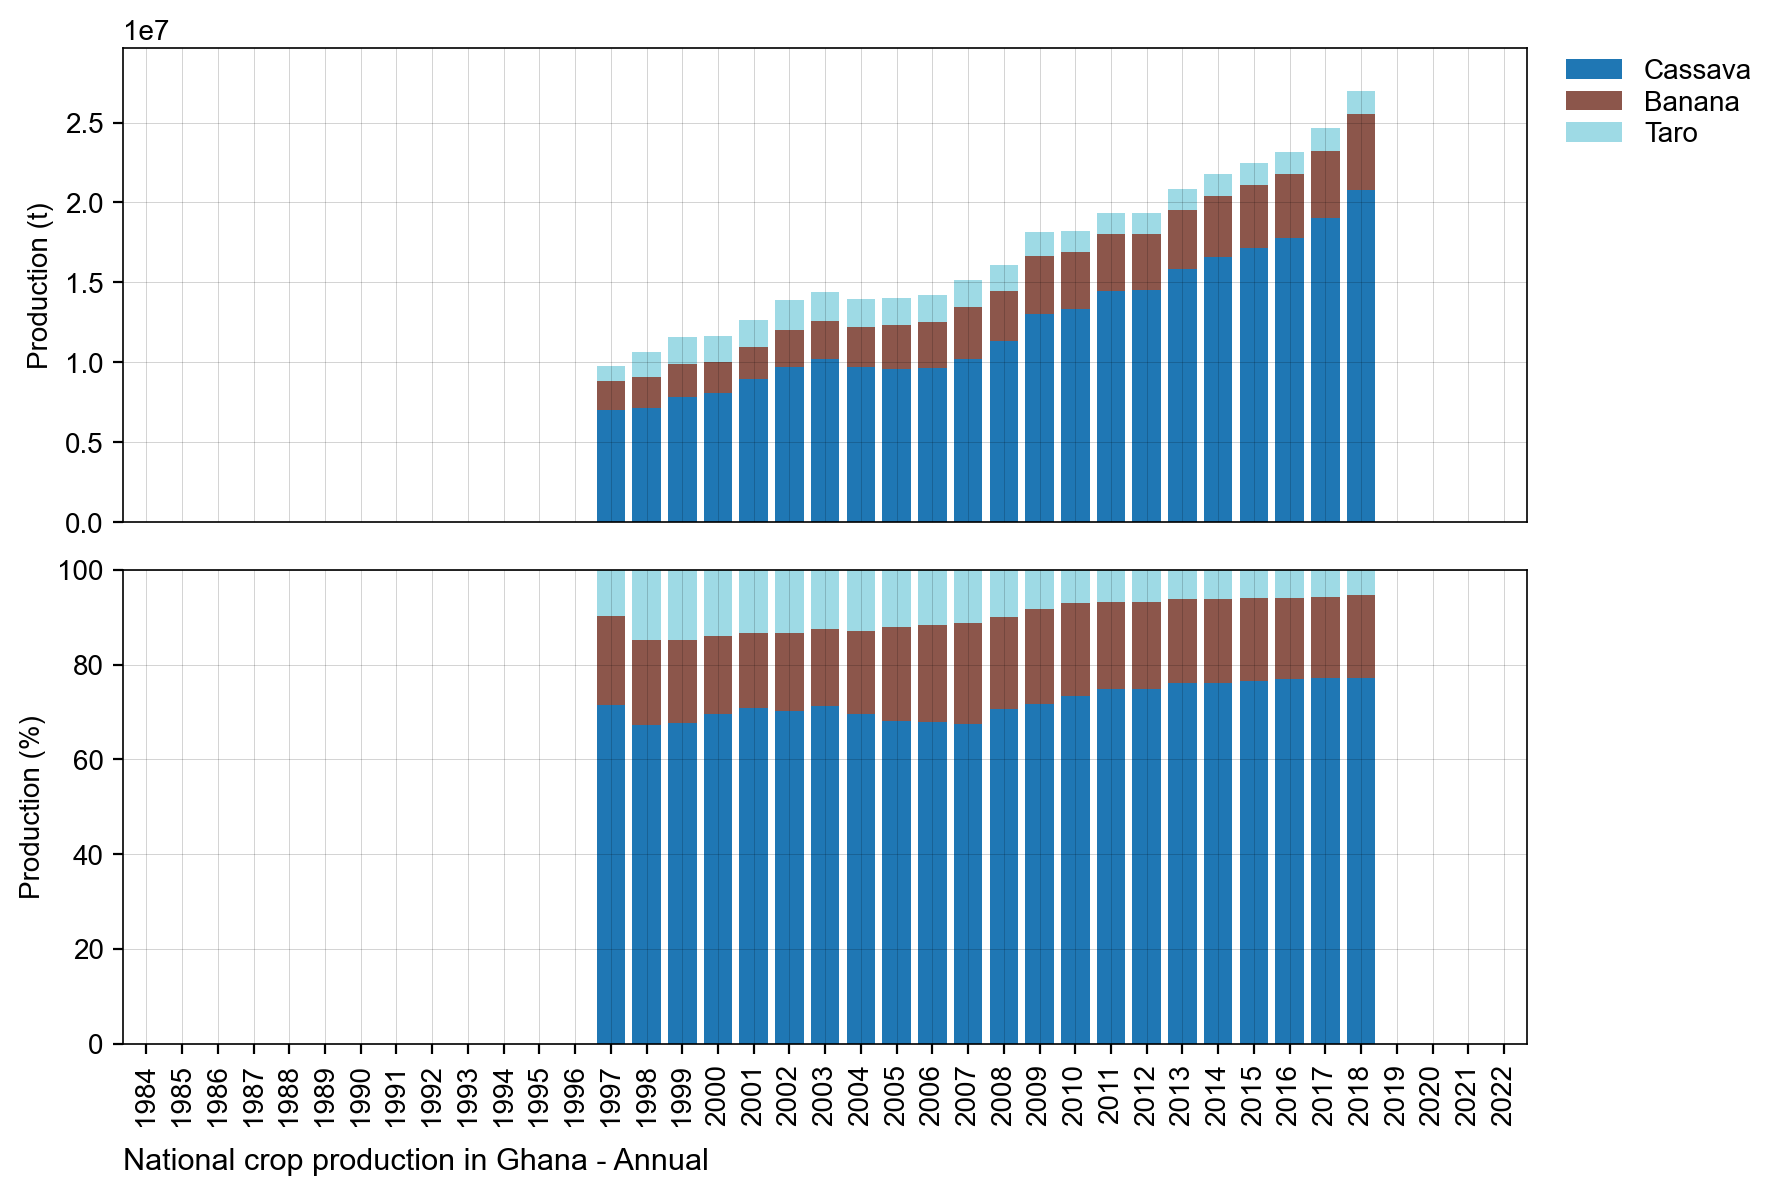

../figures/GH_bar_natgrainprod_Annual.png is saved.


/Users/weston/Documents/Code/Project/HarvestStat/HarvestStat/notebook/tools_graphic.py:135: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  axes[1].grid(which='minor', axis='x', linestyle='-', color='black', visible=False)


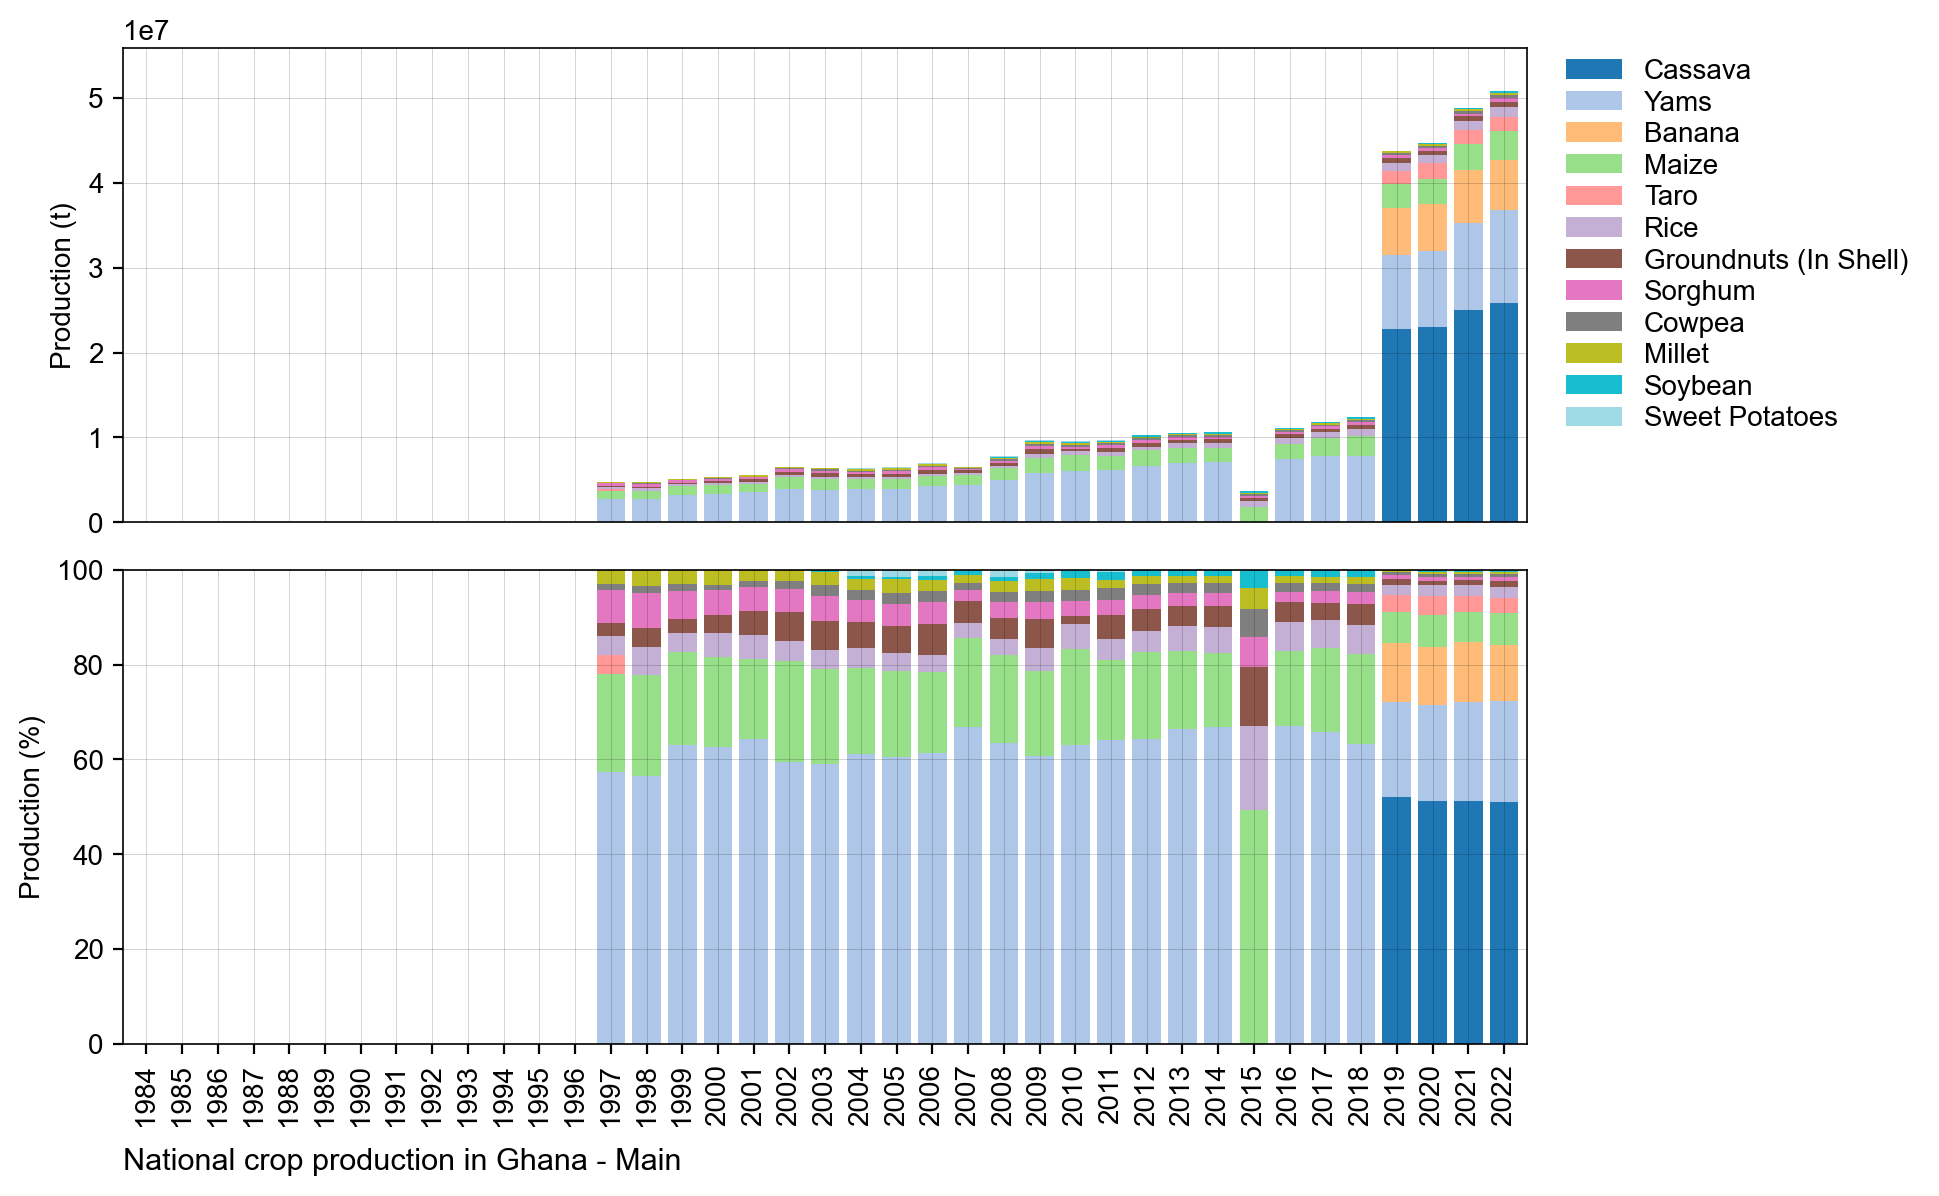

../figures/GH_bar_natgrainprod_Main.png is saved.


In [7]:
# Bar chart of national grain production
country_iso, country_name = 'GH', 'Ghana'
df = pd.read_csv('../data/crop/adm_crop_production_%s.csv' % country_iso, index_col=0)
df['year'] = df['harvest_year']
year = [df['year'].min(), df['year'].max()]
product_order = ['Maize', 'Millet', 'Sorghum', 'Rice']
for season_name in ['Annual', 'Main', 'Second']:
    footnote = 'National crop production in %s - %s' % (country_name, season_name)
    fn_save = '../figures/%s_bar_natgrainprod_%s.png' % (country_iso, season_name)
    sub = df[df['season_name'] == season_name]
    if len(sub)<5:
        continue
    fig = PlotBarProduction(sub, year, footnote, fn_save)

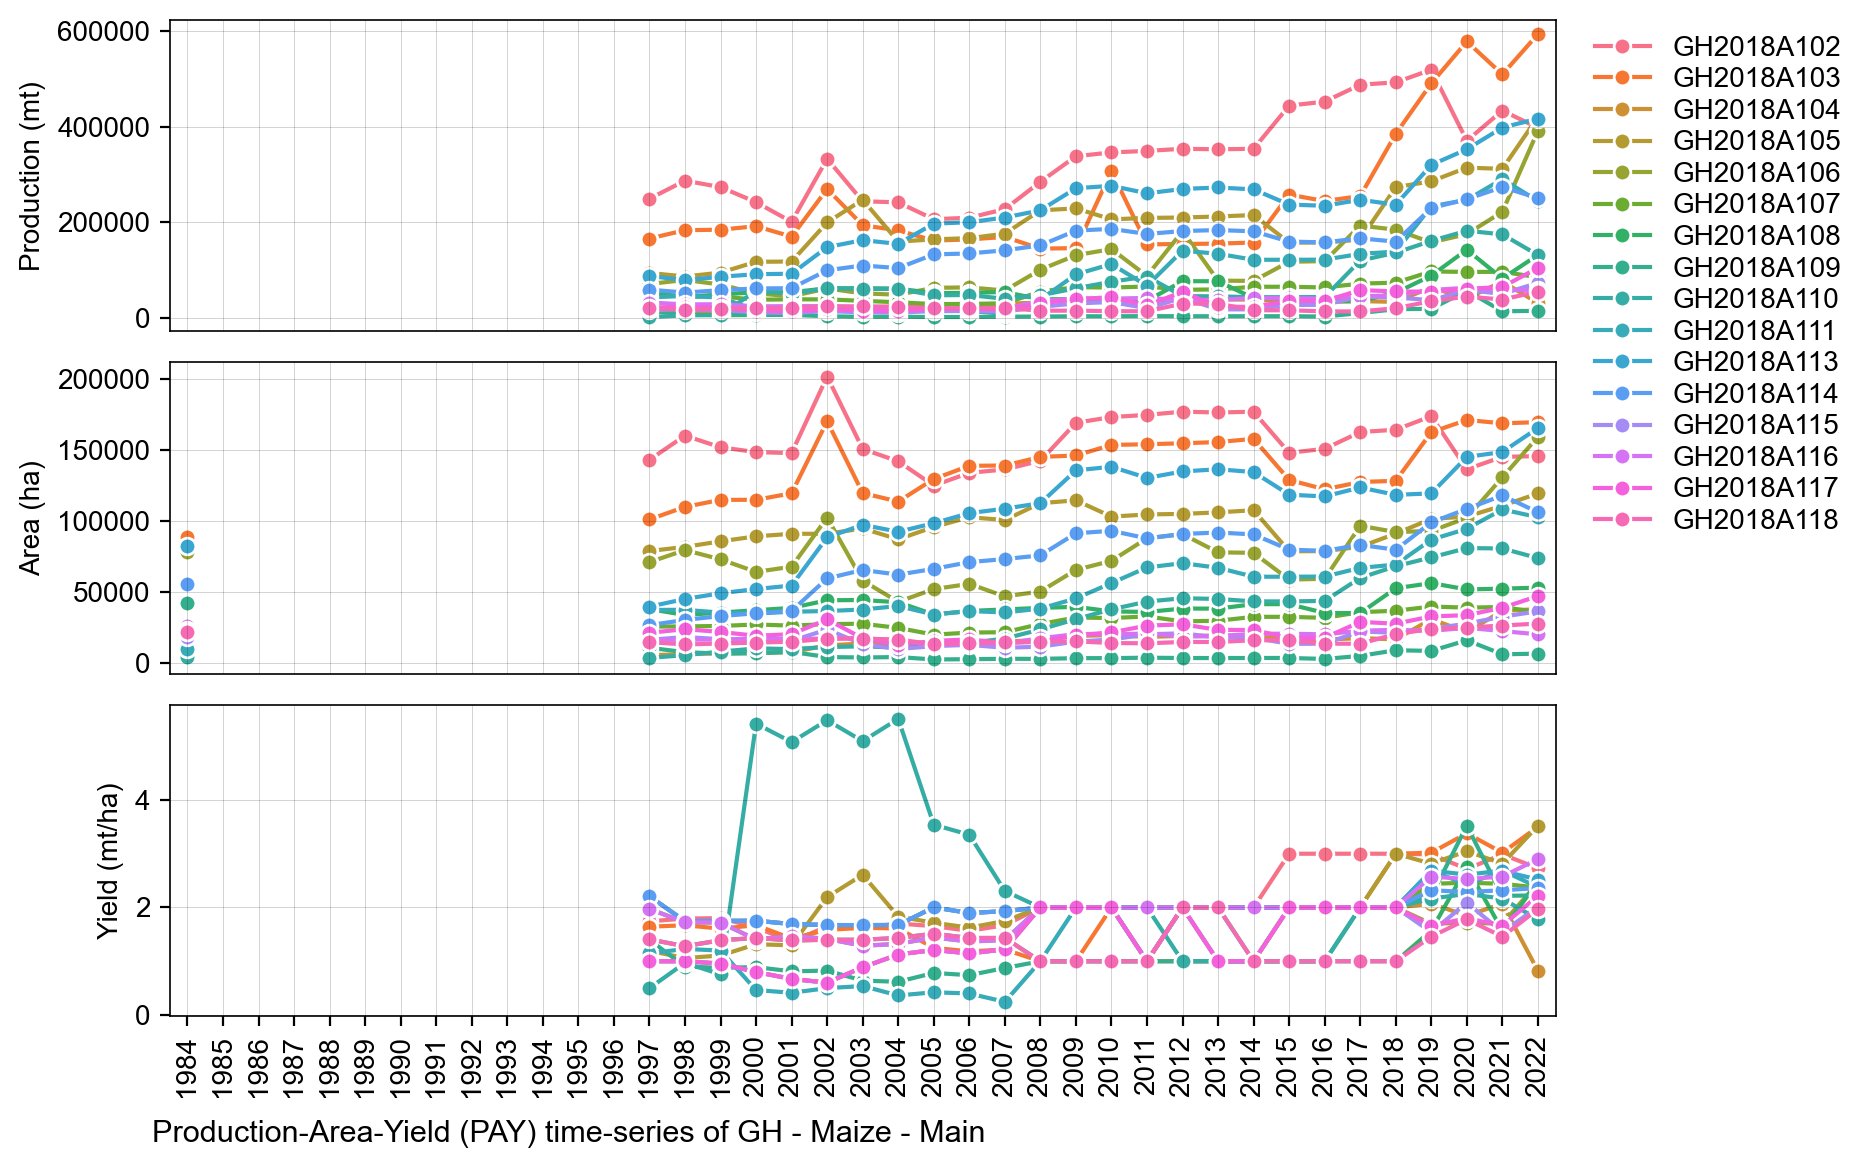

../figures/GH_line_pay_Maize_Main.png is saved.


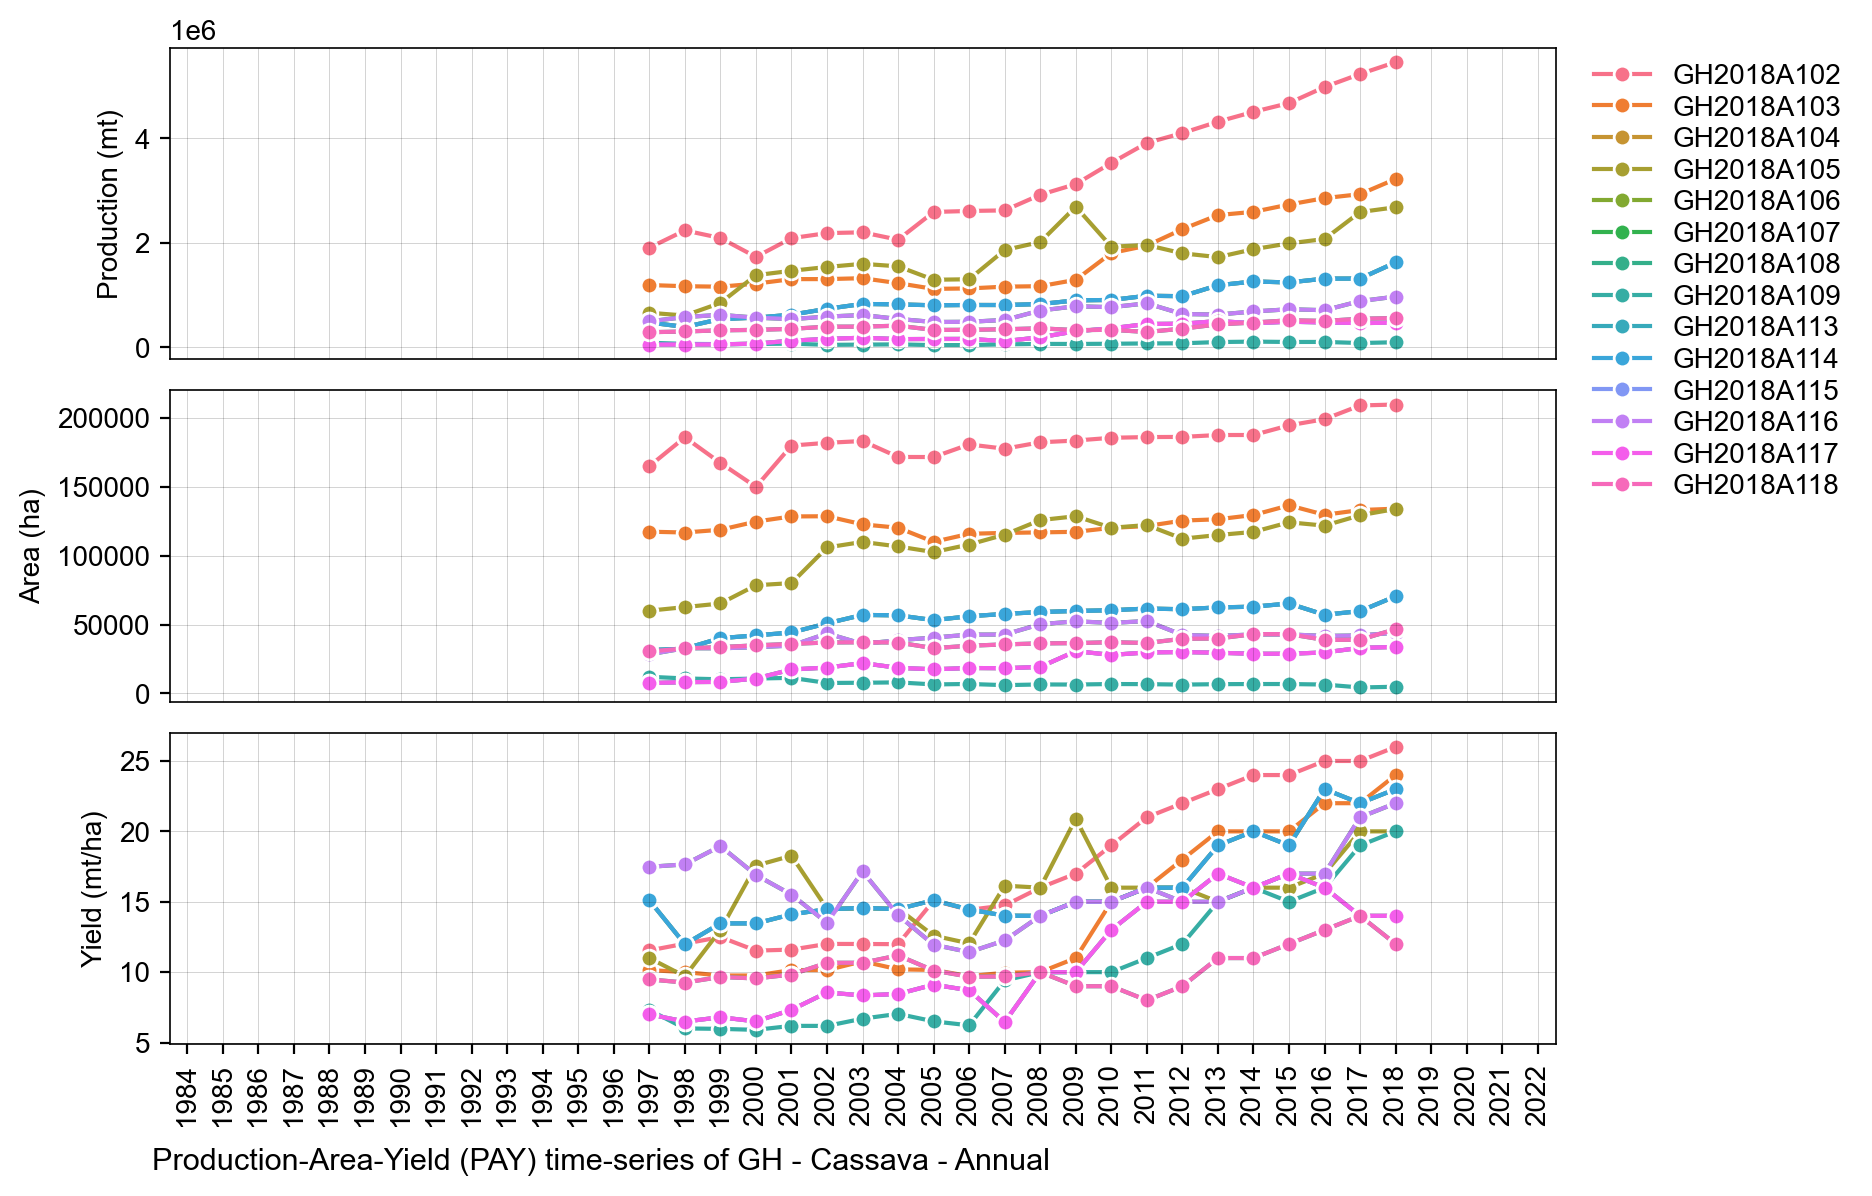

../figures/GH_line_pay_Cassava_Annual.png is saved.


In [8]:
# Lineplot of Production-Area-Yield (PAY) time-series
country_iso, country_name = 'GH', 'Ghana'
df = pd.read_csv('../data/crop/adm_crop_production_%s.csv' % country_iso, index_col=0)
df['year'] = df['harvest_year']
year = [df['year'].min(), df['year'].max()]
product_season = [
    ['Maize', 'Main'],
    ['Cassava', 'Annual'],
]
for product_name, season_name in product_season:
    footnote = 'Production-Area-Yield (PAY) time-series of %s - %s - %s' % (country_iso, product_name, season_name)
    fn_save = '../figures/%s_line_pay_%s_%s.png' % (country_iso, product_name, season_name)
    sub = df[(df['product'] == product_name) & (df['season_name'] == season_name)]
    fig = PlotLinePAY(sub, year, footnote, fn_save)